In [4]:
import urllib.request
import io
import zipfile

import matplotlib.pyplot as plt
import networkx as nx
from igraph import compare_communities
import numpy as np

# Football Network #

### Full Football Network (115 nodes, 12 clusters) 

In [108]:
url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

sock = urllib.request.urlopen(url)  # open URL
s = io.BytesIO(sock.read())  # read into BytesIO "file"
sock.close()

zf = zipfile.ZipFile(s)  # zipfile object
txt = zf.read("football.txt").decode()  # read info file
gml = zf.read("football.gml").decode()  # read gml data
# throw away bogus first line with # from mejn files
gml = gml.split("\n")[1:]
G = nx.parse_gml(gml)  # parse gml data


The file football.gml contains the network of American football games
between Division IA colleges during regular season Fall 2000, as compiled
by M. Girvan and M. Newman.  The nodes have values that indicate to which
conferences they belong.  The values are as follows:

  0 = Atlantic Coast
  1 = Big East
  2 = Big Ten
  3 = Big Twelve
  4 = Conference USA
  5 = Independents
  6 = Mid-American
  7 = Mountain West
  8 = Pacific Ten
  9 = Southeastern
 10 = Sun Belt
 11 = Western Athletic

If you make use of these data, please cite M. Girvan and M. E. J. Newman,
Community structure in social and biological networks,
Proc. Natl. Acad. Sci. USA 99, 7821-7826 (2002).

Correction: Two edges were erroneously duplicated in this data set, and
have been removed (21 SEP 2014)



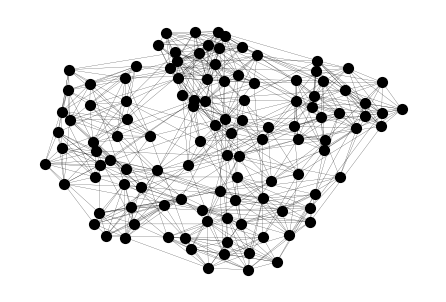

In [109]:
print(txt)
# print degree for each team - number of games
# for n, d in G.degree():
#     print(f"{n:20} {d:2}")

options = {"node_color": "black", "node_size": 125, "linewidths": 0, "width": 0.2}

pos = nx.spring_layout(G, seed=15)  # Seed for reproducible layout
nx.draw(G, pos, **options)
plt.show()

In [110]:
# What do I need? #
# step one: the "correct answers" graph #
G_int = nx.convert_node_labels_to_integers(G, first_label=0, ordering='default', label_attribute=None)
labels = list(nx.get_node_attributes(G,"value").values())

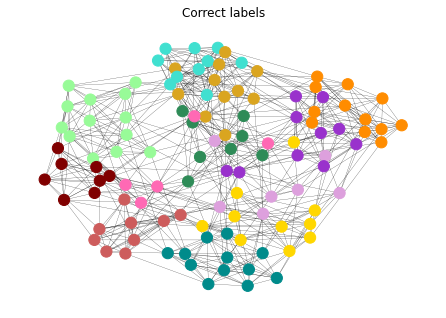

In [111]:
colors = ["indianred","maroon","goldenrod","darkorange","gold","hotpink","palegreen","seagreen","turquoise","darkcyan","plum","darkorchid"]
color_map = [colors[i] for i in labels]
pos = nx.spring_layout(G, seed=15)  # Seed for reproducible layout
nx.draw(G, pos, node_color=color_map, node_size=125, width = 0.2)
plt.title("Correct labels")
plt.show()

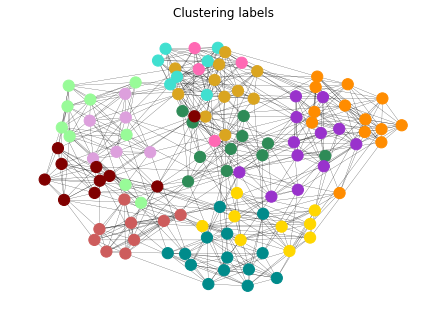

In [129]:
# step two: our clustered version" #
colors = ["turquoise","plum","indianred","goldenrod","hotpink","darkorchid","palegreen","gold","seagreen","maroon","darkcyan","darkorange"]
clustered_labels_dict = [[{'BrighamYoung': 8, 'FloridaState': 2, 'Iowa': 3, 'KansasState': 11, 'NewMexico': 8, 'TexasTech': 11, 'PennState': 3, 'SouthernCalifornia': 0, 'ArizonaState': 4, 'SanDiegoState': 8, 'Baylor': 11, 'NorthTexas': 8, 'NorthernIllinois': 1, 'Northwestern': 3, 'WesternMichigan': 1, 'Wisconsin': 3, 'Wyoming': 8, 'Auburn': 10, 'Akron': 6, 'VirginiaTech': 9, 'Alabama': 10, 'UCLA': 0, 'Arizona': 0, 'Utah': 8, 'ArkansasState': 5, 'NorthCarolinaState': 2, 'BallState': 1, 'Florida': 10, 'BoiseState': 8, 'BostonCollege': 9, 'WestVirginia': 9, 'BowlingGreenState': 6, 'Michigan': 3, 'Virginia': 2, 'Buffalo': 6, 'Syracuse': 9, 'CentralFlorida': 6, 'GeorgiaTech': 2, 'CentralMichigan': 1, 'Purdue': 3, 'Colorado': 11, 'ColoradoState': 8, 'Connecticut': 6, 'EasternMichigan': 1, 'EastCarolina': 7, 'Duke': 2, 'FresnoState': 5, 'OhioState': 3, 'Houston': 7, 'Rice': 5, 'Idaho': 4, 'Washington': 0, 'Kansas': 11, 'SouthernMethodist': 5, 'Kent': 6, 'Pittsburgh': 9, 'Kentucky': 10, 'Louisville': 7, 'LouisianaTech': 5, 'LouisianaMonroe': 10, 'Minnesota': 3, 'MiamiOhio': 6, 'Vanderbilt': 10, 'MiddleTennesseeState': 10, 'Illinois': 3, 'MississippiState': 10, 'Memphis': 7, 'Nevada': 5, 'Oregon': 0, 'NewMexicoState': 5, 'SouthCarolina': 10, 'Ohio': 6, 'IowaState': 11, 'SanJoseState': 5, 'Nebraska': 11, 'SouthernMississippi': 7, 'Tennessee': 10, 'Stanford': 4, 'WashingtonState': 0, 'Temple': 9, 'Navy': 9, 'TexasA&M': 11, 'NotreDame': 9, 'TexasElPaso': 5, 'Oklahoma': 11, 'Toledo': 1, 'Tulane': 7, 'Mississippi': 10, 'Tulsa': 5, 'NorthCarolina': 2, 'UtahState': 8, 'Army': 7, 'Cincinnati': 7, 'AirForce': 8, 'Rutgers': 9, 'Georgia': 10, 'LouisianaState': 10, 'LouisianaLafayette': 11, 'Texas': 11, 'Marshall': 6, 'MichiganState': 3, 'MiamiFlorida': 9, 'Missouri': 11, 'Clemson': 2, 'NevadaLasVegas': 8, 'WakeForest': 2, 'Indiana': 3, 'OklahomaState': 11, 'OregonState': 0, 'Maryland': 2, 'TexasChristian': 5, 'California': 4, 'AlabamaBirmingham': 7, 'Arkansas': 10, 'Hawaii': 5}, 'limit', 0.15]]
clustered_labels_dict = clustered_labels_dict[0][0]
clustered_labels = [clustered_labels_dict[n] for n in G.nodes()]
clustered_color_map = [colors[i] for i in clustered_labels]
pos = nx.spring_layout(G, seed=15)  # Seed for reproducible layout
nx.draw(G, pos, node_color=clustered_color_map, node_size=125, width = 0.2)
plt.title("Clustering labels")
plt.show()

In [35]:
football_nmi = compare_communities(labels, clustered_labels,'nmi')
print(football_nmi)

0.8625475820603943


### Summary of full football network clustering attempt ###
This network had 115 nodes and 12 clusters. It took about 1 hour to cluster using the limit PageRank variation with α=0.15 / ε=0.85. This clustering attempt had an NMI of about 0.86.

### Half Football Network (60 nodes, 6 clusters) ###

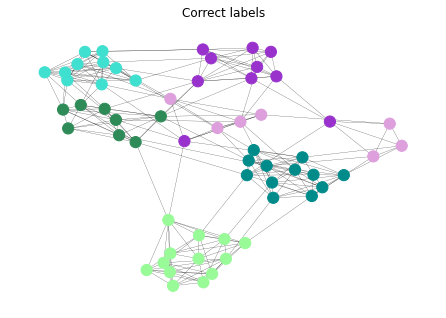

In [24]:
# Deleting approx half the nodes #
G_half = G.copy()

for i in range(len(G.nodes())):
    if labels[i] < 6:
        G_half.remove_node(list(G.nodes())[i])
        
labels_half = list(nx.get_node_attributes(G_half,"value").values())
color_map_half = [colors[i] for i in labels_half]
pos_half = nx.spring_layout(G_half, seed=15)  # Seed for reproducible layout
nx.draw(G_half, pos_half, node_color=color_map_half, node_size=125, width = 0.2)
plt.title("Correct labels")
plt.show()

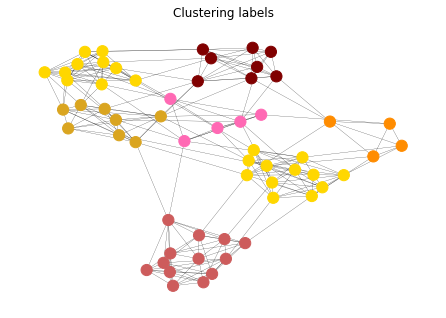

In [31]:
half_clustering_labels_dict = [[{'BrighamYoung': 2, 'NewMexico': 2, 'SouthernCalifornia': 4, 'ArizonaState': 4, 'SanDiegoState': 2, 'NorthTexas': 5, 'NorthernIllinois': 0, 'WesternMichigan': 0, 'Wyoming': 2, 'Auburn': 4, 'Akron': 0, 'Alabama': 4, 'UCLA': 4, 'Arizona': 4, 'Utah': 2, 'ArkansasState': 5, 'BallState': 0, 'Florida': 4, 'BoiseState': 5, 'BowlingGreenState': 0, 'Buffalo': 0, 'CentralMichigan': 0, 'ColoradoState': 2, 'EasternMichigan': 0, 'FresnoState': 1, 'Rice': 1, 'Idaho': 5, 'Washington': 4, 'SouthernMethodist': 1, 'Kent': 0, 'Kentucky': 4, 'LouisianaTech': 3, 'LouisianaMonroe': 3, 'MiamiOhio': 0, 'Vanderbilt': 4, 'MiddleTennesseeState': 3, 'MississippiState': 4, 'Nevada': 1, 'Oregon': 4, 'NewMexicoState': 5, 'SouthCarolina': 4, 'Ohio': 0, 'SanJoseState': 1, 'Tennessee': 4, 'Stanford': 4, 'WashingtonState': 4, 'TexasElPaso': 1, 'Toledo': 0, 'Mississippi': 4, 'Tulsa': 1, 'AirForce': 2, 'Georgia': 4, 'LouisianaState': 4, 'LouisianaLafayette': 3, 'Marshall': 0, 'NevadaLasVegas': 2, 'OregonState': 4, 'California': 4, 'Arkansas': 4, 'Hawaii': 1}, 'limit', 0.15]]
half_clustering_labels_dict = half_clustering_labels_dict[0][0]
half_clustered_labels = [half_clustering_labels_dict[n] for n in G_half.nodes()]
half_clustered_color_map = [colors[i] for i in half_clustered_labels]
pos = nx.spring_layout(G_half, seed=15)  # Seed for reproducible layout
nx.draw(G_half, pos, node_color=half_clustered_color_map, node_size=125, width = 0.2)
plt.title("Clustering labels")
plt.show()

In [33]:
half_football_nmi = compare_communities(labels_half, half_clustered_labels,'nmi')
print(half_football_nmi)

0.8473757004412162


### Summary of half football network clustering attempt ###
This network had 60 nodes and 6 clusters. It took about 20 minutes to cluster using the limit PageRank variation with α=0.15 / ε=0.85. This clustering attempt had an NMI of about 0.85. Only 2 nodes were incorrectly labeled.

# Stochastic Block Matrices

In [22]:
from run_script import cluster_edge_list as cluster

In [47]:
from igraph import compare_communities
def NMI(true_labels,clustering_labels):
    return compare_communities(true_labels,clustering_labels,'nmi')

In [32]:
def generate(sizes,probabilities,show=False,seed=None):
    """
    Given the sizes and probabilities of inter and intra cluster
    connections, generate a stochastic block matrix and its labels

    returns
    G (NetworkX stochastic block matrix)
    pos (NetworkX graph positioning)
    labels (list)
    """
    # generate random stochastic block matrix
    G = nx.stochastic_block_model(sizes, probabilities, seed=seed)
    pos = nx.spring_layout(G)

    # create true labels
    labels = []
    for i in enumerate(sizes):
        label = i[0]
        size = i[1]
        labels = labels + list(label*np.ones(size))
    labels = [int(i) for i in labels]

    # display matrix with correct labels if desired
    if show:
        color_map = labels
        nx.draw(G, pos, node_color=color_map)
        plt.show()
    
    return(G, pos,labels)

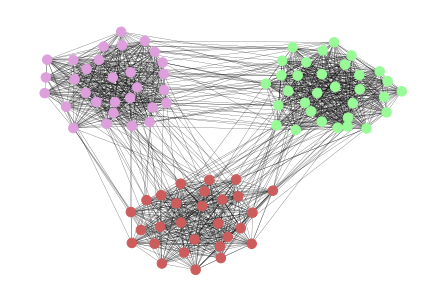

In [91]:
sizes2 = [28,32,30]
probabilities2 = [[0.9,0.05,0.05],[0.05,0.9,0.05],[0.05,0.05,0.9]]
S2, pos2, labels2 = generate(sizes2,probabilities2)
nx.write_gexf(S2, "S2.gexf")
S2 = nx.read_gexf("S2.gexf")


labels2 = []
for i in enumerate(sizes2):
    label = i[0]
    size = i[1]
    labels2 = labels2 + list(label*np.ones(size))
labels2 = [int(i) for i in labels2]
colors = ["indianred","palegreen","plum"]
color_map2 = [colors[i] for i in labels2]
nx.draw(S2,with_labels=False,node_color=color_map2,node_size=90, width = 0.2)
plt.show()

In [92]:
clustered_labels_dict2 = cluster(S2,k=3)

limit
0.15


In [93]:
clustered_labels_dict2 = clustered_labels_dict2[0][0]

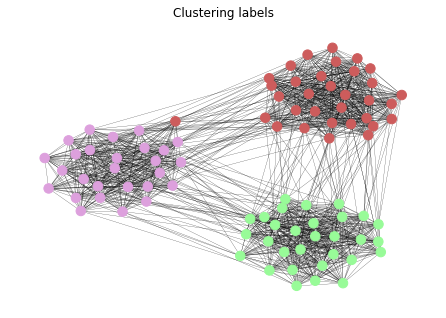

In [94]:
clustered_labels2 = [clustered_labels_dict2[n] for n in S2.nodes()]
clustered_color_map2 = [colors[i] for i in clustered_labels2]
nx.draw(S2, node_color=clustered_color_map2, node_size=90, width = 0.2)
plt.title("Clustering labels")
plt.show()

In [95]:
NMI(labels2,clustered_labels2)

0.9554252105034581